# ESA 9: Linear Regression
## Exercise 1
### Read and visualize the data

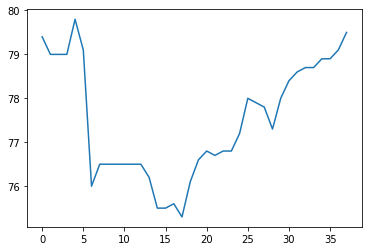

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('weight-entries.csv')
#df.head
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

plt.plot(y)
plt.show()

### Train the model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predictions = lin_reg.predict(X_test)
print(y_predictions)

[77.75483133 77.45735602 77.69533626 77.50495207 77.55254812 77.58824515
 77.68343725 77.79052836]


### Visualize the Regression Curve

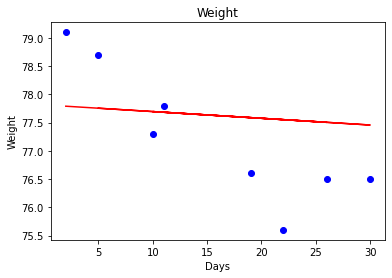

In [20]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test,y_predictions, color = 'red')
plt.title('Weight')
plt.xlabel('Days')
plt.ylabel('Weight')
plt.show()

## Exercise 2

Original provided by the author in GitHub: https://github.com/ageron/handson-ml/blob/9798a68ded892679957b8a1303ea0b7d0f75fe92/04_training_linear_models.ipynb
from the exceptional book: _Hands on Machine Learning with Scikit-Learn and TensorFlow by Aurelien Geron, OReilly 2017, ISBN: 9781491962299_

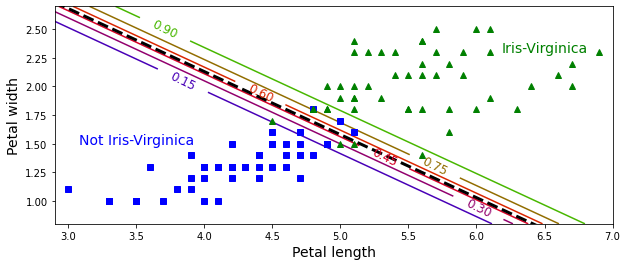

In [21]:
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()


### Is this a Iris Virginica?
#### Test with one feature

In [22]:
X_sepal_length = iris["data"][:, (0)]  # sepal length
X_sepal_length = X_sepal_length.reshape(-1, 1)

log_reg_sepal_length = LogisticRegression(C=10**10, random_state=42)
log_reg_sepal_length.fit(X_sepal_length, y)
print("Considering only the sepal length feature:", log_reg_sepal_length.predict([[4.8]]))

X_sepal_width = iris["data"][:, (1)]  # sepal width
X_sepal_width = X_sepal_width.reshape(-1, 1)

log_reg_sepal_width = LogisticRegression(C=10**10, random_state=42)
log_reg_sepal_width.fit(X_sepal_width, y)
print("Considering only the sepal width feature:", log_reg_sepal_width.predict([[2.5]]))

X_petal_length = iris["data"][:, (2)]  # petal length
X_petal_length = X_petal_length.reshape(-1, 1)

log_reg_petal_length = LogisticRegression(C=10**10, random_state=42)
log_reg_petal_length.fit(X_petal_length, y)
print("Considering only the petal length feature:", log_reg_petal_length.predict([[5.3]]))

X_petal_width = iris["data"][:, (3)]  # petal width
X_petal_width = X_petal_width.reshape(-1, 1)

log_reg_sepal_width = LogisticRegression(C=10**10, random_state=42)
log_reg_sepal_width.fit(X_petal_width, y)
print("Considering only the petal width feature:", log_reg_sepal_width.predict([[2.4]]))

Considering only the sepal length feature: [0]
Considering only the sepal width feature: [0]
Considering only the petal length feature: [1]
Considering only the petal width feature: [1]


#### Test with two features
Given values: `4.8,2.5,5.3,2.4`
Hint: If the result is 1, it is an Iris Virginica.

In [25]:
print(log_reg.predict([[5.3, 2.4]]))

[1]


##### Conclusion
Considering only the petal features, it could be an Iris Virginica.

#### Test with all four features

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### Preparing data set

In [27]:
# Features
X = data.iloc[:, :-1]

# Species
y = data.iloc[:, -1]

##### Splitting into training and test set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)
print(X_train)
print(y_train)

     sepal_length  sepal_width  petal_length  petal_width
56            6.3          3.3           4.7          1.6
22            4.6          3.6           1.0          0.2
25            5.0          3.0           1.6          0.2
50            7.0          3.2           4.7          1.4
89            5.5          2.5           4.0          1.3
58            6.6          2.9           4.6          1.3
90            5.5          2.6           4.4          1.2
118           7.7          2.6           6.9          2.3
54            6.5          2.8           4.6          1.5
71            6.1          2.8           4.0          1.3
73            6.1          2.8           4.7          1.2
97            6.2          2.9           4.3          1.3
42            4.4          3.2           1.3          0.2
107           7.3          2.9           6.3          1.8
70            5.9          3.2           4.8          1.8
62            6.0          2.2           4.0          1.0
60            

##### Training of the learner

In [29]:
learner = LogisticRegression(C=1e5, max_iter=10000)
learner.fit(X_train, y_train)

LogisticRegression(C=100000.0, max_iter=10000)

##### Testing the model

In [30]:
y_predictions = learner.predict(X_test)
print(y_predictions)

['virginica' 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'virginica' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'virginica' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'virginica' 'setosa' 'setosa' 'setosa'
 'virginica' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa' 'setosa'

##### Check classication

In [31]:
classification = classification_report(y_test, y_predictions)
print(classification)
accuracy = accuracy_score(y_test, y_predictions)
print("The accuracy is:", accuracy)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        41
  versicolor       0.71      1.00      0.83        34
   virginica       1.00      0.69      0.82        45

    accuracy                           0.88       120
   macro avg       0.90      0.90      0.88       120
weighted avg       0.92      0.88      0.88       120

The accuracy is: 0.8833333333333333


##### Check actual values from question

In [32]:
actualPredictions = learner.predict([[4.8,2.5,5.3,2.4]])
print(actualPredictions)

['virginica']


##### Conclusion
Is could be an Iris Virginica.